c:\Users\Andrea.Bagante\AppData\Local\pypoetry\Cache\virtualenvs\interprete-DgaYok6E-py3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


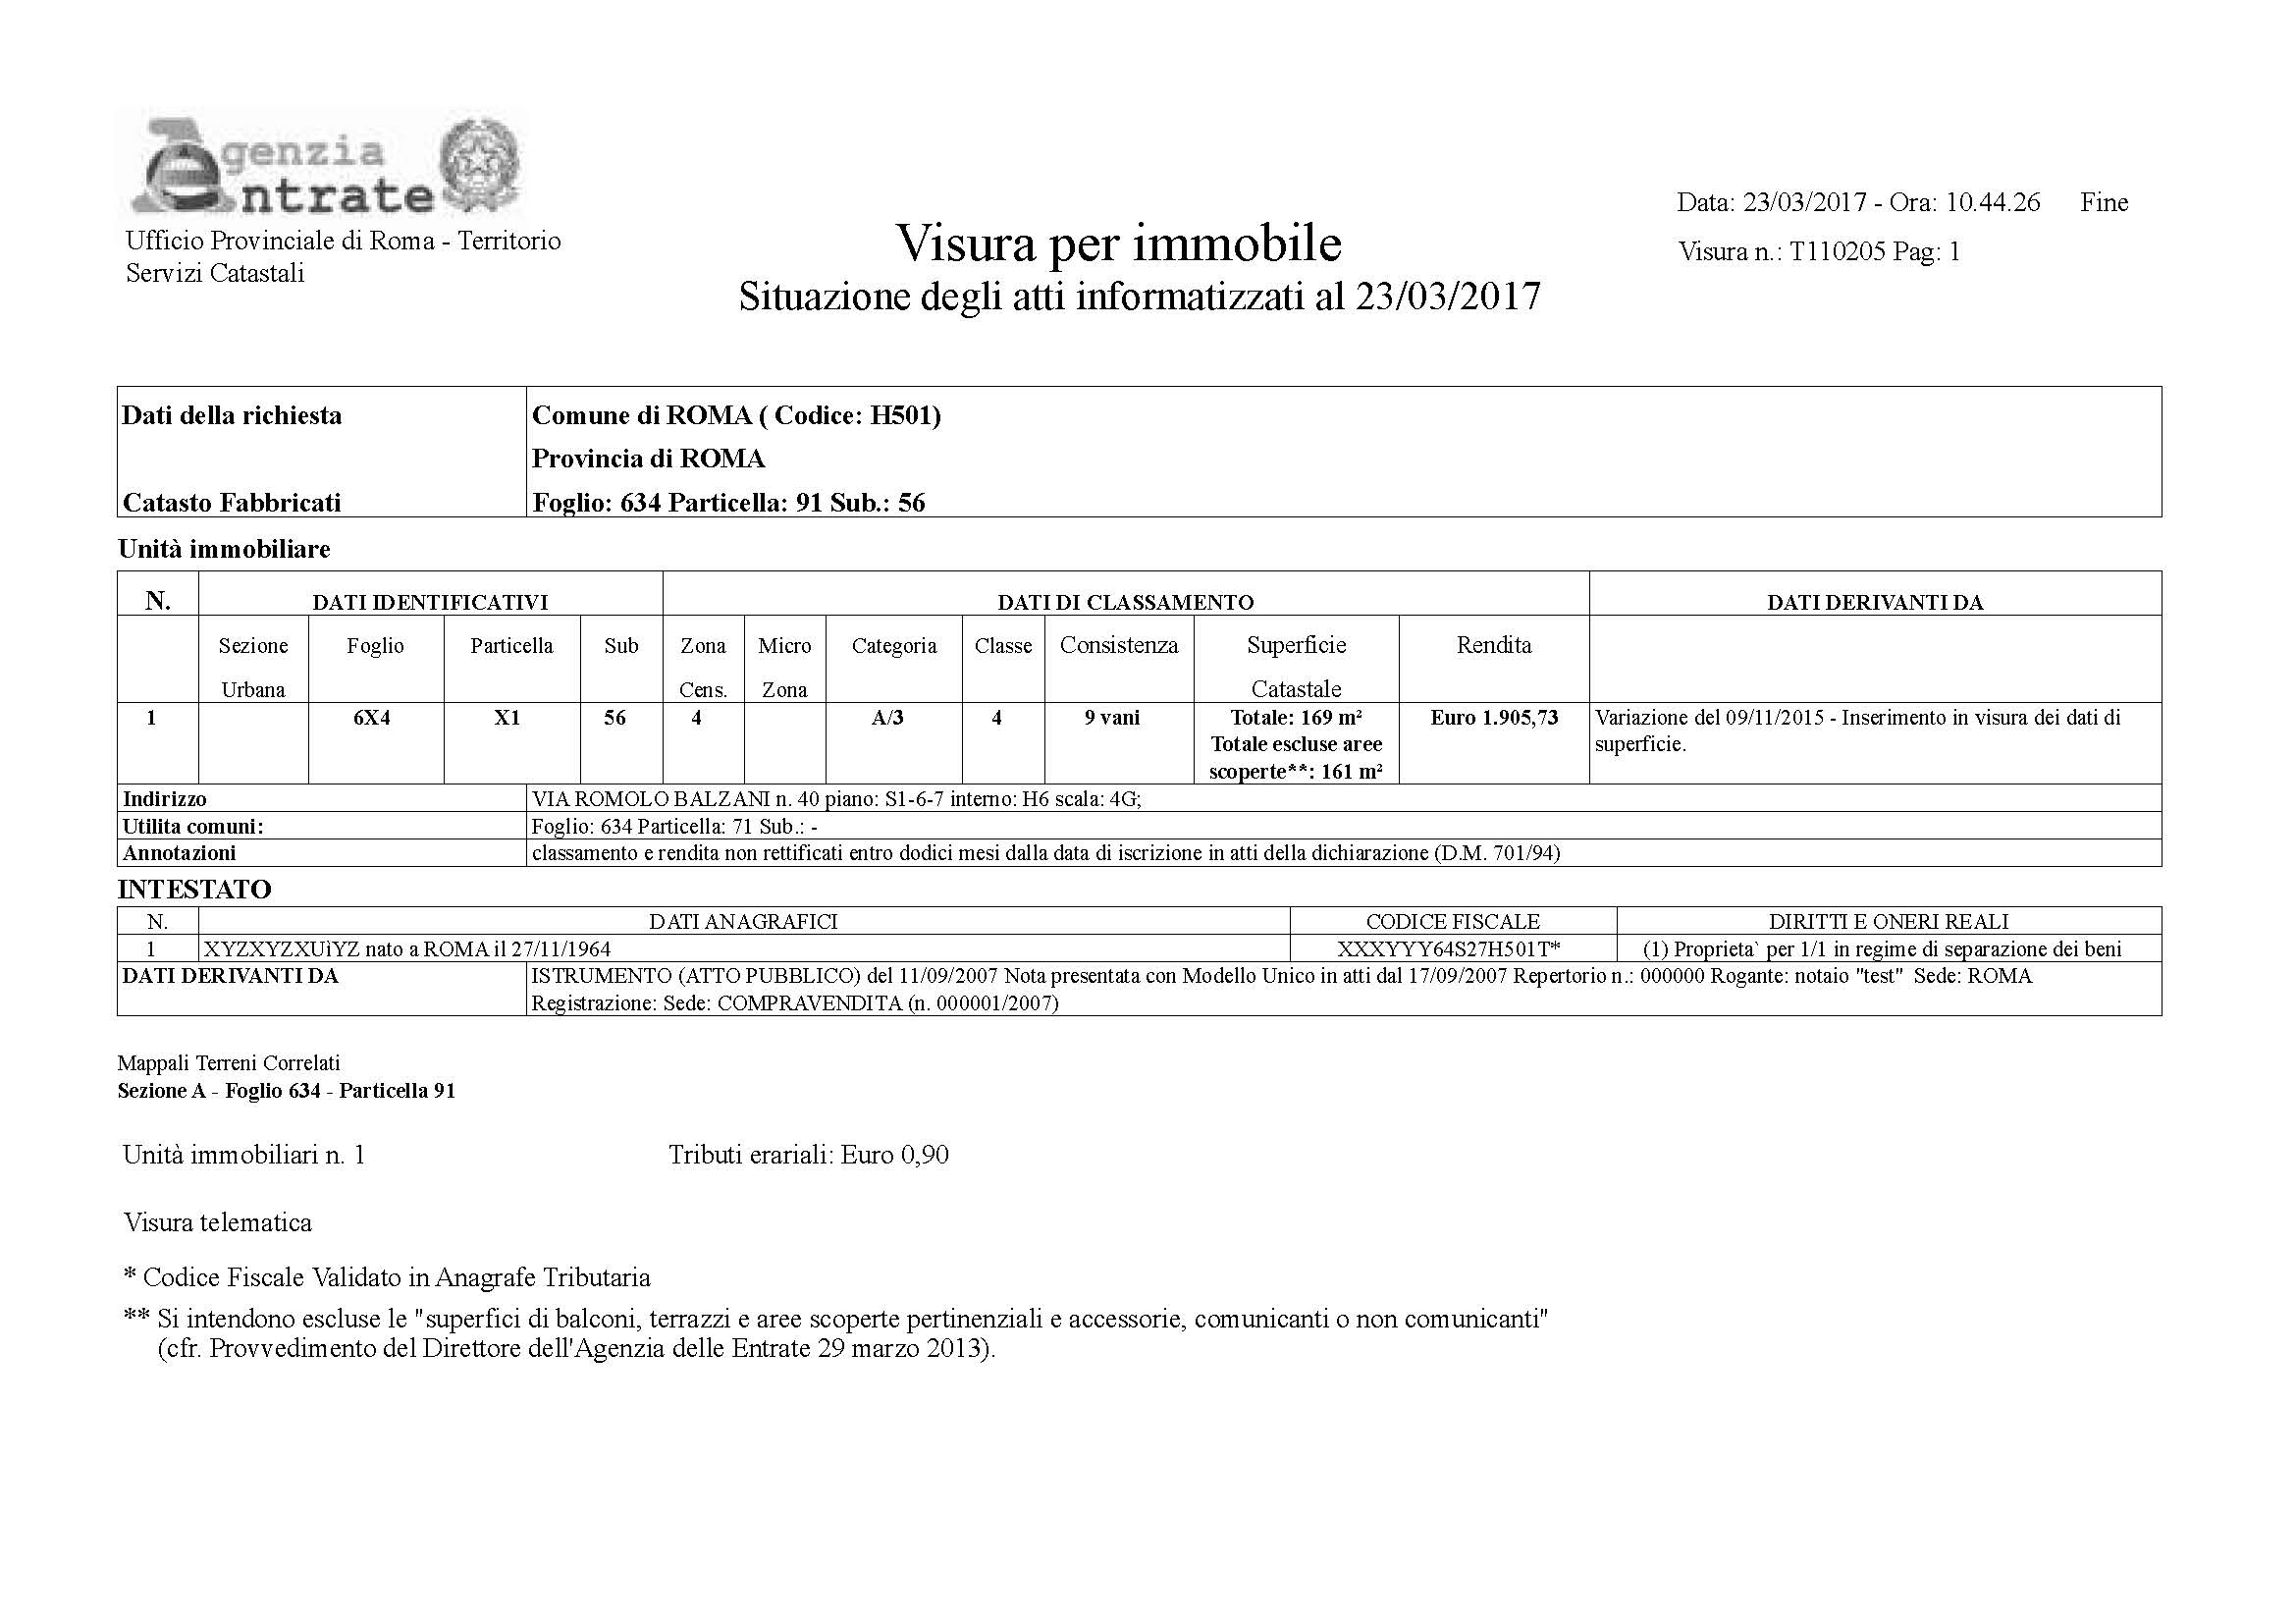

In [1]:
from PIL import Image
from surya.detection import DetectionPredictor
#from surya.recognition import RecognitionPredictor

import torch

#TORCH_DEVICE="cuda"

path = "C:\\Users\\Andrea.Bagante\\Desktop\\interprete\\visura_catastale_analitica.png"
#path = "C:\\Users\\Andrea.Bagante\\Desktop\\interprete\\visura_camerale.jpg"
#path = "C:\\Users\\Andrea.Bagante\\Desktop\\interprete\\visura_ipotecaria.jpg"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

image = Image.open(path)
langs = ["it"]    #["it"]
display(image)

In [2]:
det_predictor = DetectionPredictor()

predictions = det_predictor([image])
predictions

Loaded detection model vikp/surya_det3 on device cuda with dtype torch.float16


Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


[TextDetectionResult(bboxes=[PolygonBox(polygon=[[1703, 194], [2083, 194], [2083, 218], [1703, 218]], confidence=0.9605936408042908, bbox=[1703, 194, 2083, 218]), PolygonBox(polygon=[[2114, 194], [2171, 194], [2171, 217], [2114, 217]], confidence=0.7686796188354492, bbox=[2114, 194, 2171, 217]), PolygonBox(polygon=[[906, 223], [1376, 223], [1376, 270], [906, 270]], confidence=0.9785056114196777, bbox=[906, 223, 1376, 270]), PolygonBox(polygon=[[122, 234], [574, 232], [575, 256], [122, 258]], confidence=0.9257932305335999, bbox=[122, 232, 575, 258]), PolygonBox(polygon=[[1705, 242], [2000, 245], [1999, 270], [1704, 267]], confidence=0.9570112824440002, bbox=[1704, 242, 2000, 270]), PolygonBox(polygon=[[122, 265], [313, 265], [313, 290], [122, 290]], confidence=0.9518935680389404, bbox=[122, 265, 313, 290]), PolygonBox(polygon=[[746, 283], [1574, 283], [1574, 320], [746, 320]], confidence=0.9785056114196777, bbox=[746, 283, 1574, 320]), PolygonBox(polygon=[[120, 411], [350, 411], [350, 4

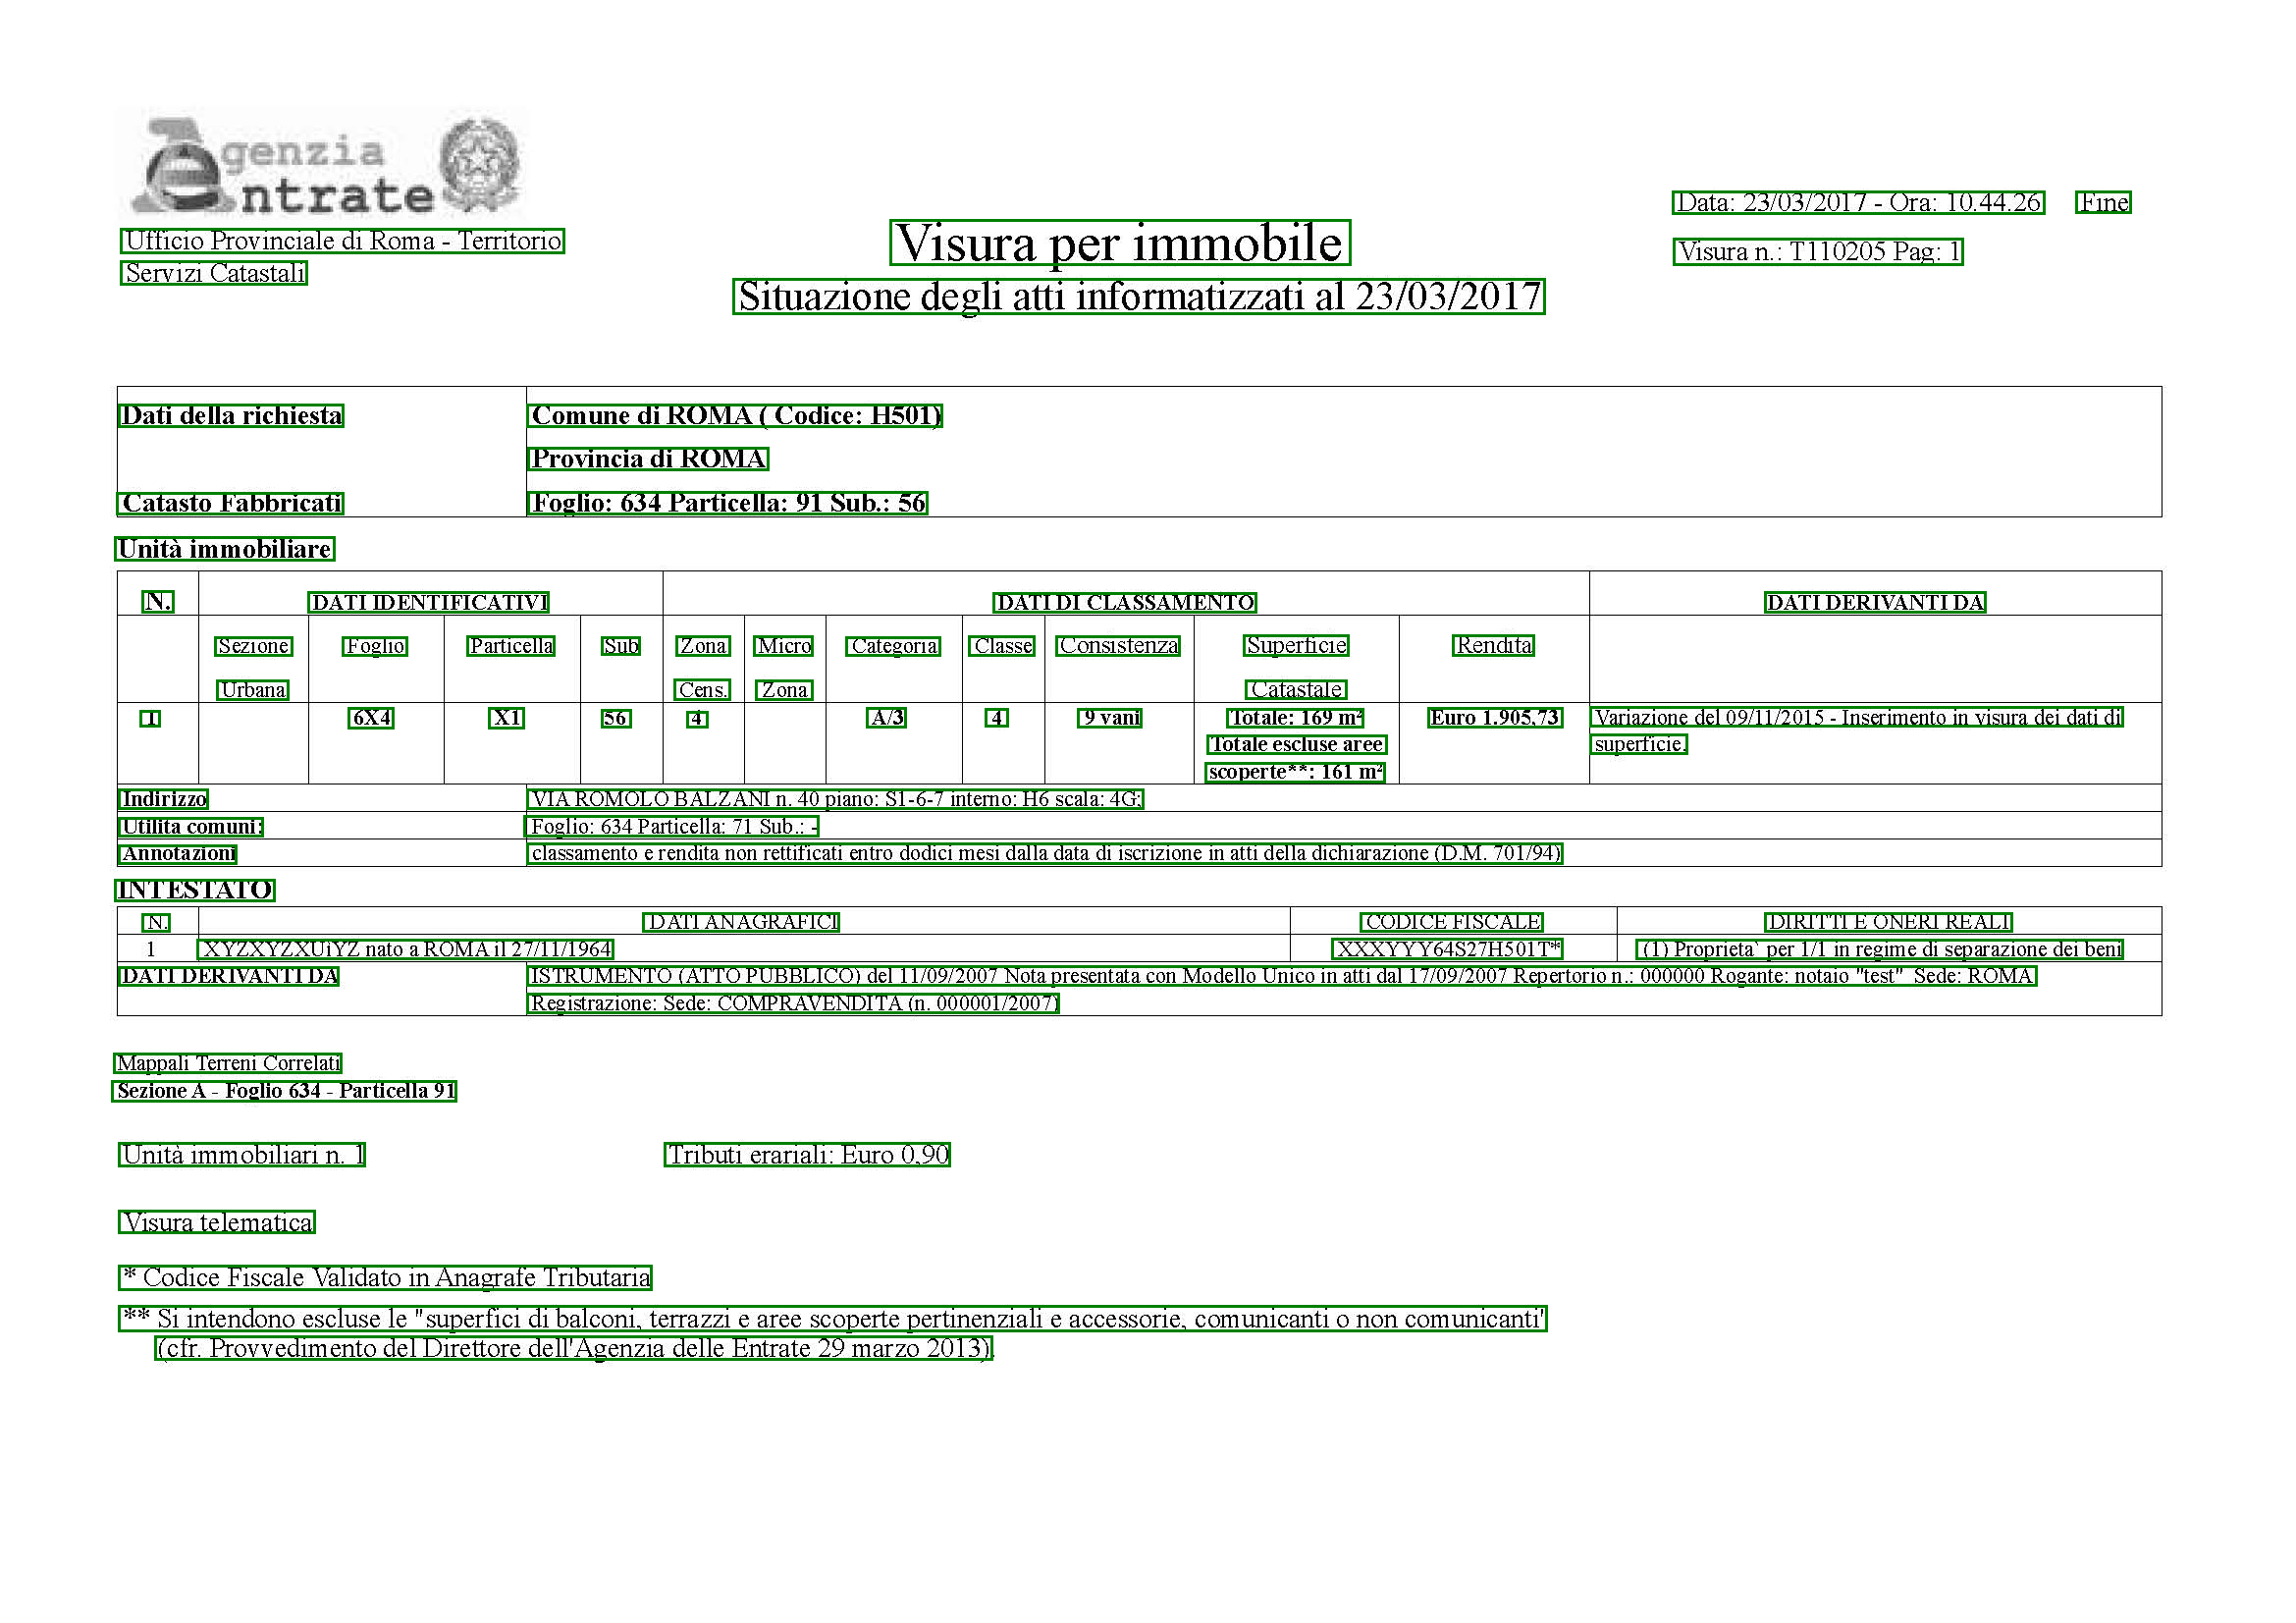

In [3]:
from PIL import ImageDraw

objs = []
bboxes = []
for t in predictions[0].bboxes:
  objs.append([t.polygon,t.confidence,t.bbox])
  bboxes.append(t.bbox)

for obj in objs:
  x1, y1, x2, y2 = obj[2]
  draw = ImageDraw.Draw(image)
  draw.rectangle([x1, y1, x2, y2], outline='green', width=3)
display(image)

In [4]:
# for bbox in bboxes:
#     x1, y1, x2, y2 = bbox
#     print(x1, y1, x2, y2)

In [5]:
from PIL import Image
from doctr.models import ocr_predictor
import numpy as np

predictor = ocr_predictor('db_resnet50', 'crnn_vgg16_bn', pretrained=True)

immagine = Image.open(path)
immagine_arr = np.asarray(immagine)
risultato_doctr = predictor([immagine_arr])

lines = []

for block in risultato_doctr.pages[0].blocks:
    for line in block.lines:
        line_text = ""
        for word in line.words:
            line_text += word.value + " "
        lines.append(line_text.strip())

# Join all lines with actual line breaks
formatted_text = "\n".join(lines)

texts = []
texts.append(formatted_text)

print(texts)

c:\Users\Andrea.Bagante\AppData\Local\pypoetry\Cache\virtualenvs\interprete-DgaYok6E-py3.11\Lib\site-packages\doctr\models\utils\pytorch.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experim

['genzia\nntrate\nData: 23/03/2017-Ora: 10.44.26 Fine\nUfficio Provinciale di Roma - Territorio\nVisura per immobile\nVisura n.: T110205 Pag: 1\nServizi Catastali\nSituazione degli atti informatizzati al 23/03/2017\nDati della richiesta\nComune di ROMA ( Codice: H501)\nProvincia di ROMA\nCatasto Fabbricati\nFoglio: 634 Particella: 91 Sub.: 56\nUnità immobiliare\nN.\nDATI IDENTIFICATIVI\nDATI] DI CLASSAMENTO\nDATI DERIVANTI DA\nSezione Foglio Particella Sub Zona Micro Categoria Classe Consistenza Superficie\nRendita\nUrbana\nCens. Zona\nCatastale\n1\n6X4\nX1 56 4\nA/3 4 9vani Totale: 169 m2 Euro 1.905,73 Variazione del 09/11/2015. Inserimento in visura dei dati di\nTotale escluse aree\nsuperficie.\nscoperte**: 161 m2\nIndirizzo\nVIA ROMOLOI BALZANI n.4 40 piano: S1-6-7 intemo: H6 scala: 4G,\nUtilita comuni:\nFoglio: 634 Particella: 71 Sub. :\nAnnotazioni\nclassamento et rendita non rettificati entro dodici mesi dalla data di iscrizione in atti della dichiarazione (D.M. 701/94)\nINTESTAT

In [6]:
lines_list = []
for text in texts:
    lines = text.split('\n')  # Dividi il testo usando il carattere di a capo
    lines_list.extend(lines)  # Aggiungi le righe alla nuova lista

one_line_text = ' '.join(lines_list)
#print(one_line_text)

# LLM

In [8]:
from transformers import AutoModelForCausalLM, BitsAndBytesConfig, AutoTokenizer, pipeline
import torch

#model_id = "meta-llama/Llama-3.2-3B-Instruct"
model_id = "mistralai/Mistral-Small-24B-Instruct-2501"

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
)

quantized_model = AutoModelForCausalLM.from_pretrained(
    model_id, device_map="cuda:0", torch_dtype=torch.bfloat16, quantization_config=quantization_config)

tokenizer = AutoTokenizer.from_pretrained(model_id)

Loading checkpoint shards: 100%|██████████| 10/10 [00:36<00:00,  3.64s/it]


In [9]:
prompt_cat_an = f"Extract the information of 'Foglio', 'Particella', 'Subalterno' and put them in a json format. \
     Extract one json for each occurrence of 'Foglio'. Pay attention that 'Particella' and 'Subalterno' could have more than one value for each 'Foglio'.\
     Do not add any text other than the json\s. Here is the text: {one_line_text}"

prompt_cam = f"Extract the information of 'Ispezione numero', 'Richiedente', 'Foglio', 'Particella', 'Subalterno' and put them in a json format. \
     Extract one json for each time you find any repetition of this element. Do not add any text other than the json\s. Here is the text: {formatted_text}"

prompt_ipo = f"Extract the information of 'Ispezione numero', 'Richiedente', 'Foglio', 'Particella', 'Subalterno' and put them in a json format. \
     Extract one json for each time you find any repetition of this element. Do not add any text other than the json\s. Here is the text: {formatted_text}"

In [11]:
# https://huggingface.co/meta-llama/Llama-3.3-70B-Instruct

pipe = pipeline(
    "text-generation",
    model=quantized_model, #quantized_model
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="cuda:0",
    tokenizer=tokenizer
)

messages = [
    {"role": "system", "content": "You are a helpful legal assistant who have to understand and interpret legal documents!"},
    {"role": "user", "content": prompt_cat_an},
]

outputs = pipe(
    messages,
    max_new_tokens=256,
)

print(outputs[0]["generated_text"][-1])

# for seq in outputs:
#     print(f"Result: {seq['generated_text']}")

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


{'role': 'assistant', 'content': '```json\n{\n  "Foglio": "634",\n  "Particella": ["91", "71"],\n  "Subalterno": ["56"]\n}\n```'}


### Pixtral

In [8]:
from PIL import Image
import requests
from transformers import AutoModelForCausalLM, AutoProcessor, BitsAndBytesConfig, LlavaForConditionalGeneration
import torch
from IPython.display import display
import time


# Define model ID
model_id = "mistral-community/pixtral-12b"

# Load processor
processor = AutoProcessor.from_pretrained(model_id, use_fast=True)

# Define BitsAndBytes configuration for 4-bit quantization
# nf4_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_quant_type="nf4",
#     bnb_4bit_use_double_quant=True,
#     bnb_4bit_compute_dtype=torch.bfloat16,
# )

# Load model with 4-bit quantization and map to CUDA
model = LlavaForConditionalGeneration.from_pretrained(
    model_id,
    device_map="cuda:0",
    torch_dtype=torch.bfloat16,
    #quantization_config=nf4_config,
    _attn_implementation='eager').to("cuda:0") # use _attn_implementation='eager' to disable flash attention

Loading checkpoint shards: 100%|██████████| 6/6 [00:58<00:00,  9.72s/it]


In [9]:
def model_inference(messages, path_image):
        
    image = Image.open(path_image)

    # Prepare prompt with image token
    prompt = processor.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )

    # Process prompt and image for model input
    inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

    # Generate text response using model
    generate_ids = model.generate(
        **inputs,
        eos_token_id=processor.tokenizer.eos_token_id,
        max_new_tokens=500,
        do_sample=False,
        temperature=0.0,
    )

    # Remove input tokens from generated response
    generate_ids = generate_ids[:, inputs["input_ids"].shape[1] :]

    # Decode generated IDs to text
    response = processor.batch_decode(
        generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )[0]

    return response

In [10]:
prompt_cat_vlm = f"Extract the information of 'Foglio', 'Particella', 'Subalterno' and put them in a json format. \
    Extract one json for each unique occurrence of these value. Pay attention that 'Particella' and 'Subalterno' could have more than one value for each 'Foglio'. \
    Help yourself with the provided image. The text is extracted from this image. Do not add any text other than the json with 'Foglio', 'Particella', 'Subalterno'. \
    Here is the text: {formatted_text}"

In [ ]:
message = [
    {
        "role": "user", "content": [
            {"type": "image"},
            {"type": "text", "content": prompt_cat_vlm},
        ]
    }
]

result = model_inference(message, path)
print(result)

#RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (CUDABFloat16Type) should be the same
# --> pip install git+https://github.com/huggingface/transformers accelerate

### Qwen

In [7]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoTokenizer, AutoProcessor, BitsAndBytesConfig
from qwen_vl_utils import process_vision_info
import torch
from PIL import Image

model_id = "Qwen/Qwen2.5-VL-7B-Instruct"

min_pixels = 256 * 28 * 28
max_pixels = 1280 * 28 * 28

processor = AutoProcessor.from_pretrained(model_id, min_pixels=min_pixels, max_pixels=max_pixels)

nf4_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
)

# Load model with 4-bit quantization and map to CUDA
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    model_id,
    device_map="cuda",
    trust_remote_code=True,
    torch_dtype="auto",
    quantization_config=nf4_config,
    _attn_implementation='eager') # use _attn_implementation='eager' to disable flash attention

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.
Loading checkpoint shards: 100%|██████████| 5/5 [00:17<00:00,  3.49s/it]


In [8]:
prompt_cat_vlm = f"Extract the information of 'Foglio', 'Particella', 'Subalterno' and put them in a json format. \
    Extract one json for each unique occurrence of these value. Pay attention that 'Particella' and 'Subalterno' could have more than one value for each 'Foglio'. \
    Help yourself with the provided image. The text is extracted from this image. Do not add any text other than the json with 'Foglio', 'Particella', 'Subalterno'. \
    Here is the text: {one_line_text}"

In [9]:
def model_inference(path_image):

    image = Image.open(path_image)

    message = [
    {
        "role": "user", "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": prompt_cat_vlm},
        ]
    }
]

    # Preparation for inference
    text = processor.apply_chat_template(
        message, tokenize=False, add_generation_prompt=True
    )
    image_inputs, video_inputs = process_vision_info(message)
    inputs = processor(
        text=[text],
        images=image_inputs,
        videos=video_inputs,
        padding=True,
        return_tensors="pt",
    )
    inputs = inputs.to("cuda")

    # Inference: Generation of the output
    generated_ids = model.generate(**inputs, max_new_tokens=500)
    generated_ids_trimmed = [
        out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )
    return output_text

In [10]:
result = model_inference(path)
print(result)

["```json\n[\n    {\nfoglio': '634',\n    'Particella': '91',\n    'Subalterno': '56'\n]\n```"]


### ROIs

('CAMERADI', 0.9989054203033447)


('COMMERCIO', 0.9998213648796082)


('MILANO', 0.9999881982803345)


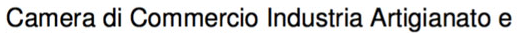

('CameradiCommercicindustradingianate', 0.9363629221916199)


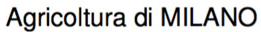

('AgricolturadiMILANO', 0.9996479749679565)


('Registromprese-ArchivicuficiedellacCia', 0.9424372911453247)


('VISURAORDINARIAGCIETNDICARTALE', 0.9210435152053833)


('DATIANAGRAFICI', 0.999916136264801)


('AXAASSICURAZIONISPA', 0.9964826703071594)


('IndirizzoSedelegale', 0.9984104633331299)
Testo riga 1: CAMERADI 

Testo riga 2: COMMERCIO 

Testo riga 3: MILANO 

Testo riga 4: CameradiCommercicindustradingianate 

Testo riga 5: AgricolturadiMILANO 

Testo riga 6: Registromprese-ArchivicuficiedellacCia 

Testo riga 7: VISURAORDINARIAGCIETNDICARTALE 

Testo riga 8: DATIANAGRAFICI 

Testo riga 9: AXAASSICURAZIONISPA 

Testo riga 10: IndirizzoSedelegale 



In [ ]:
from PIL import Image
from doctr.models import ocr_predictor, recognition_predictor
import numpy as np

#predictor = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn')
predictor = recognition_predictor(arch="parseq", pretrained=True, symmetric_pad=True, batch_size=1).cuda()  

def ocr_con_coordinate(immagine_path, bboxes):
    """
    Esegue l'OCR su un'immagine usando le coordinate fornite.

    Args:
        immagine_path: Il percorso all'immagine.
        bboxes: Una lista di tuple (x1, y1, x2, y2) che rappresentano le coordinate delle linee di testo.

    Returns:
        Una lista di stringhe, dove ogni stringa è il testo estratto da una linea.
    """

    immagine = Image.open(immagine_path)#.convert("RGB") # Convertiamo in RGB per Doctr
    testi = []

    for x1, y1, x2, y2 in bboxes:
        # Ritaglia la porzione di immagine
        immagine_ritagliata = immagine.crop((x1-5, y1-5, x2+5, y2+5))

        display(immagine_ritagliata)

        immagine_ritagliata_arr = np.asarray(immagine_ritagliata)

        # Esegui l'OCR
        risultato_doctr = predictor([immagine_ritagliata_arr])

        print(risultato_doctr)

        # Estrai il testo (Doctr restituisce una struttura più complessa, dobbiamo estrarre il testo)
        testo_estratto = ""
        # for block in risultato_doctr.pages[0].blocks:
        #     for line in block.lines:
        #         for word in line.words:
        #             testo_estratto += word.value + " "
        #         testo_estratto = testo_estratto.strip() + "\n" # Aggiungiamo un newline dopo ogni riga

        testo_estratto += risultato_doctr[0][0] + " "
        testo_estratto = testo_estratto.strip() + "\n"

        testi.append(testo_estratto.strip())  # Aggiungiamo il testo alla lista

    return testi


# Esempio di utilizzo:
testi_estratti = ocr_con_coordinate(path, bboxes[:10])

for i, testo in enumerate(testi_estratti):
    print(f"Testo riga {i+1}: {testo}")